In [1]:
import pandas as pd
import numpy as np
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import matplotlib.pyplot as plt
import matplotlib.colors as col
from ast import literal_eval
import seaborn as sns
from statannotations.Annotator import Annotator
import pickle
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FormatStrFormatter

In [2]:
def assign_group(protein, group1_name: list, group1_string, group2_name: list, group2_string ):
    if protein in group1_name:
        return group1_string
    elif protein in group2_name:
        return group2_string
    else:
        return 'Not in any group'

def assign_groups_advanced(protein, group1_name: list, group1_string, group2_name: list, group2_string, group3_name: list, group3_string, group4_name: list, group4_string ):
    if protein in group1_name:
        return group1_string
    elif protein in group2_name:
        return group2_string
    elif protein in group3_name:
        return group3_string
    elif protein in group4_name:
        return group4_string
    else:
        return 'Not in any group'


def count_consecutive_stretches_of_1(lst, label="IDR"):
    count = 0
    current_stretch = False
    start_stop_list = []
    for index, num in enumerate(lst):
        if num == 1:
            if current_stretch == False:
                start = index
                current_stretch = True
                count += 1
        else:
            if current_stretch == True:
                current_stretch = False
                stop = index
                start_stop_list.append((start, stop, label))
    if current_stretch == True:
        start_stop_list.append((start, len(lst), label))
    return start_stop_list
### count_consecutive_stretches_of_1([1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0], "IDR") --> [(0, 4, 'IDR'), (13, 21, 'IDR')]

def is_either_between(low_range, high_range, a, b):
    ### a and b are start and end of the motif
    ### low_range and high_range are the start and end of the IDR
    ### it will output true if the motif only as much as toucehs the IDR region
    return (low_range <= a <= high_range) or (low_range <= b <= high_range)

# print(is_either_between(10,20, 5,50))
# print(is_either_between(10,70, 65,80))


In [3]:
##### here choose either human, mouse or merged

choice = 'human'


motif_info_set_df = pd.read_parquet(r'/mnt/d/phd/scripts/3_mus_musculus/output/merged/annotated_sets/GAR_motif_Wang_set_merged_v3_annot.parquet')
annotated_IDR_df_1 = pd.read_parquet(r"/mnt/d/phd/scripts/1_feature_curation/output/annotation_datasets/all_IDR_human.parquet")
annotated_IDR_df_2 = pd.read_parquet(r"/mnt/d/phd/scripts/3_mus_musculus/output/mouse/annotation_datasets/all_IDR_mouse.parquet")
annotated_IDR_df_1['source'] = 'human'
annotated_IDR_df_2['source'] = 'mouse'
annotated_IDR_df = pd.concat([annotated_IDR_df_1, annotated_IDR_df_2])

annotated_domain_df_1 = pd.read_csv(r"/mnt/d/phd/scripts/1_feature_curation/output/annotation_datasets/all_domains_human.csv")
annotated_domain_df_2 = pd.read_csv(r"/mnt/d/phd/scripts/3_mus_musculus/output/mouse/annotation_datasets/all_domains_mouse.csv")
annotated_domain_df_1['source'] = 'human'
annotated_domain_df_2['source'] = 'mouse'
annotated_domain_df = pd.concat([annotated_domain_df_1, annotated_domain_df_2])

if choice == 'human':
    motif_info_set_df = motif_info_set_df[motif_info_set_df['source'] == 'HUMAN']
    # annotated_IDR_df = annotated_IDR_df[motif_info_set_df['source'] == 'human']
    # annotated_domain_df = annotated_domain_df[motif_info_set_df['source'] == 'human']
elif choice == 'mouse':
    motif_info_set_df = motif_info_set_df[motif_info_set_df['source'] == 'MOUSE']
    # annotated_IDR_df = annotated_IDR_df[motif_info_set_df['source'] == 'mouse']
    # annotated_domain_df = annotated_domain_df[motif_info_set_df['source'] == 'mouse']
else:
    pass



In [ ]:
# motif_info_set_df.to_csv('RG_proteome_Robin_humanandmouse_300125.csv')

In [4]:
ver = "v3"
proteins_sets_dict = {}

set_names, set_list, set_files = [], [], []

GAR_full = ["GAR_subset_full"]
set_names.append("GAR_full")
set_files.append(GAR_full)
#########
GAR_LLPS_pos = ["4_LLPS_positive_set_and_GAR_subset",
                "5_LLPS_positive_set_and_NA_positive_set_and_GAR_subset"
                ]
set_names.append("GAR_LLPS_pos")
set_files.append(GAR_LLPS_pos)
###################
GAR_LLPS_pos_NA_neg = ["4_LLPS_positive_set_and_GAR_subset"
            ]
set_names.append("GAR_LLPS_pos_NA_neg")
set_files.append(GAR_LLPS_pos_NA_neg)
#########

GAR_LLPS_neg = ["6_NA_positive_set_and_GAR_subset",
                "7_GAR_subset_only"
            ]
set_names.append("GAR_LLPS_neg")
set_files.append(GAR_LLPS_neg)
#################
GAR_LLPS_neg_NA_pos = ["6_NA_positive_set_and_GAR_subset"
            ]
set_names.append("GAR_LLPS_neg_NA_pos")
set_files.append(GAR_LLPS_neg_NA_pos)

#########
GAR_NA_pos = ["5_LLPS_positive_set_and_NA_positive_set_and_GAR_subset",
            "6_NA_positive_set_and_GAR_subset"
            ]
set_names.append("GAR_NA_pos")
set_files.append(GAR_NA_pos)
#########
GAR_NA_neg = ["4_LLPS_positive_set_and_GAR_subset",
            "7_GAR_subset_only"
            ]
set_names.append("GAR_NA_neg")
set_files.append(GAR_NA_neg)
#########
GAR_pos = ["5_LLPS_positive_set_and_NA_positive_set_and_GAR_subset"
            ]
set_names.append("GAR_pos")
set_files.append(GAR_pos)
#########
#########
GAR_neg = ["7_GAR_subset_only"
            ]
set_names.append("GAR_neg")
set_files.append(GAR_neg)
#########



set_list = []
set_dict = {}

for i,member in enumerate(set_files):
    set_list_temp = []
    for el in member:
        with open(r'/mnt/d/phd/scripts/3_mus_musculus/output/merged/final_set_lists/' + ver + r'/' + el +".txt", "r") as fl:
            for line in fl:
                set_list_temp.append(line.strip())
    set_dict[set_names[i]] = set_list_temp
    set_list.append(set_list_temp)
set_list_temp = []
with open(r'/mnt/d/phd/scripts/raw_data/proteomes/list_of_all_proteins_merged.txt') as fl:
    for line in fl:
        set_list_temp.append(line.strip())
set_list.append(set_list_temp)
set_names.append('full_proteome')
set_dict['full_proteome'] = set_list_temp

proteins_sets_dict[ver] = set_dict

In [49]:
protein_dict_with_idr_metrics = {}
for i,curr_protein in enumerate(proteins_sets_dict['v3']['full_proteome']): 
# for i, curr_protein in enumerate(["Q8N1G1"]):
    if motif_info_set_df[motif_info_set_df["UniqueID"] == curr_protein].empty:
        continue
    # for i,row in human_proteome_df[human_proteome_df["UniqueIdentifier"] == "Q5SSQ6"].iterrows(): 
    # print(i, " out of ", len(proteins_sets_dict['v3']['full_proteome']))
    # print(curr_protein)
    protein_dict_with_idr_metrics[curr_protein] = {}
    if annotated_IDR_df[annotated_IDR_df["protein_name"] == curr_protein].empty:
        ## this means no IDR info yet
        flag_IDR_info_available = False
    elif annotated_IDR_df[annotated_IDR_df["protein_name"] == curr_protein]["prediction-disorder-mobidb_lite"].tolist()[0].tolist().count(-1) > 0:
        flag_IDR_info_available = False
        #### why are there proteins that have -1 as data????????
    else:
        flag_IDR_info_available = True
        #### THIS IS ALL THE IDR INFO STUFF 
        IDR_info_curr = annotated_IDR_df[annotated_IDR_df["protein_name"] == curr_protein]["prediction-disorder-mobidb_lite"].tolist()[0].tolist()
        ### collect length of motif_IDR, other IdRs, non IDR region
        all_0s = IDR_info_curr.count(0)
        all_1s = IDR_info_curr.count(1)
        motif_1s = 0
        motif_IDR_bounds, motif_range = [], []
        for j, m in motif_info_set_df[motif_info_set_df["UniqueID"] == curr_protein][["UniqueID", "start", "end", "full_seq"]].iterrows():
            # print(m)
            curr_seq = m['full_seq']
            flag_skip_this_motif = False
            motif_range.append((m['start'], m['end']))
            if m['start'] > len(IDR_info_curr)-1:
                ##### this is for those where the IDR info is not the same length as the sequence!!!!!
                flag_IDR_info_available = False
                break
            if len(motif_IDR_bounds) != 0:
                # print("HEERE")
                # print(motif_IDR_bounds)
                # print(m['start'], m['end'])
                for lr, hr in motif_IDR_bounds:
                    # print(is_either_between(lr, hr, m['start'], m['end']))
                    if is_either_between(lr, hr, m['start'], m['end']):
                        flag_skip_this_motif = True
                        continue
                if flag_skip_this_motif:
                    # print("HERE")
                    # print(m)
                    #### the whole motif will be skipped no counting necessary
                    # print(m)
                    continue 
            
              
            if IDR_info_curr[m['start']] == 1: # das heisst das der start auf jeden fall drinne is
                low_range, high_range = m['start'], m['start']
                # print("before", low_range)  
                # print("this cons 1")
                for curr_stat in IDR_info_curr[m['start']-1::-1]: #### zaehlt runter, so hier wird die lower range veraendert
                    if curr_stat == 1:
                        motif_1s += 1
                        low_range -= 1
                    else:
                        break
                for curr_stat in IDR_info_curr[m['start']:]: #### zaehlt hoch
                    if curr_stat == 1:
                        motif_1s += 1
                        high_range += 1
                    else:
                        break
            elif IDR_info_curr[m['end']-1] == 1:
                low_range, high_range = m['end'], m['end']
                # print("before", low_range)  
                # print("this cons 2")
                # print(IDR_info_curr[m['end']-1::-1])
                for curr_stat in IDR_info_curr[m['end']-1::-1]: #### zaehlt runter
                    if curr_stat == 1:
                        motif_1s += 1
                        low_range -= 1
                    else:
                        break
                for curr_stat in IDR_info_curr[m['end']:]: #### zaehlt hoch
                    if curr_stat == 1:
                        motif_1s += 1
                        high_range += 1
                    else:
                        break
            else: 
                ### here are cases ofg motifs that are found by the GAR finder but were prefilteres due to them not being in an IDR and or being in a domain
                ### they will never be comapred anyways, so i could leave it blank, i could also just make the dic all np.nan
                # print("Thsi should never happen!")
                flag_IDR_info_available = False
            # print("after", low_range)    
            motif_IDR_bounds.append((low_range,high_range))
            # motif_range.append((m['start'], m['end']))
            # print("ENDE FOR NOWWWWW")
        IDR_bounds = count_consecutive_stretches_of_1(IDR_info_curr)
        # print(motif_IDR_bounds)
        # print(IDR_bounds)
        for motifIDRtup in motif_IDR_bounds:
            # print(motifIDRtup)
            # print(IDR_bounds)
            index_change = next((index for index, tpl in enumerate(IDR_bounds) if tpl[0] == motifIDRtup[0]), None)
            # print(index_change)
            if index_change != None:
                IDR_bounds[index_change] = (IDR_bounds[index_change][0], IDR_bounds[index_change][1], "MOTIF")
        # print(IDR_bounds)
        rg_count = 0
        for lr, hr in motif_IDR_bounds:
            rg_count += curr_seq[lr:hr].count("R") + curr_seq[lr:hr].count("G")
        len_non_IDR = all_0s
        len_all_IDRs = all_1s
        len_other_IDR = all_1s - motif_1s
        len_motif_IDR = motif_1s
        len_motif_IDR_woRG = len_motif_IDR - rg_count
        # print(len_non_IDR, len_other_IDR, len_motif_IDR, len_motif_IDR_woRG)
        # print("___________")
    protein_dict_with_idr_metrics[curr_protein]['num_of_IDR_regions'] = len(count_consecutive_stretches_of_1(IDR_info_curr))
    protein_dict_with_idr_metrics[curr_protein]['num_of_IDR_regions_w_motif'] = len(motif_IDR_bounds)
    protein_dict_with_idr_metrics[curr_protein]['num_of_IDR_regions_wo_motif'] = len(count_consecutive_stretches_of_1(IDR_info_curr)) - len(motif_IDR_bounds)
    protein_dict_with_idr_metrics[curr_protein]['IDR_bounds'] = IDR_bounds
    protein_dict_with_idr_metrics[curr_protein]['motif_range'] = motif_range
    prot_length = len(motif_info_set_df[motif_info_set_df["UniqueID"] == curr_protein]['full_seq'].tolist()[0])
    # print(prot_length)
    protein_dict_with_idr_metrics[curr_protein]['protein_length'] = prot_length

proteins_with_idr_metrics_df =pd.DataFrame(protein_dict_with_idr_metrics).transpose()
proteins_with_idr_metrics_df.reset_index(inplace=True)
proteins_with_idr_metrics_df = proteins_with_idr_metrics_df.rename(columns = {'index':'proteins'})
# proteins_with_idr_metrics_df['Group'] = proteins_with_idr_metrics_df['proteins'].apply(
#                                                                     assign_group,
#                                                                     args= (set_list[set_names.index("GAR_pos")], "pos", set_list[set_names.index("GAR_neg")], "neg"))
proteins_with_idr_metrics_df['Groups_num'] = proteins_with_idr_metrics_df['proteins'].apply(
                                                                    assign_groups_advanced,
                                                                    args= (set_list[set_names.index("GAR_pos")], "5", set_list[set_names.index("GAR_neg")], "7",
                                                                           set_list[set_names.index("GAR_LLPS_pos_NA_neg")], "4", set_list[set_names.index("GAR_LLPS_neg_NA_pos")], "6"
                                                                           ))
proteins_with_idr_metrics_df['Groups_all'] = proteins_with_idr_metrics_df['proteins'].apply(
                                                                    assign_group,
                                                                    args= (set_list[set_names.index("GAR_pos")], "pos", set_list[set_names.index("GAR_neg")], "neg"))
proteins_with_idr_metrics_df['Groups_LLPS'] = proteins_with_idr_metrics_df['proteins'].apply(
                                                                    assign_group,
                                                                    args= (set_list[set_names.index("GAR_LLPS_pos")], "pos", set_list[set_names.index("GAR_LLPS_neg")], "neg"))
proteins_with_idr_metrics_df['Groups_NA'] = proteins_with_idr_metrics_df['proteins'].apply(
                                                                    assign_group,
                                                                    args= (set_list[set_names.index("GAR_NA_pos")], "pos", set_list[set_names.index("GAR_NA_neg")], "neg"))
proteins_with_idr_metrics_df = proteins_with_idr_metrics_df.infer_objects()
# proteins_with_idr_metrics_df.dtypes
proteins_with_idr_metrics_df

,proteins,num_of_IDR_regions,num_of_IDR_regions_w_motif,num_of_IDR_regions_wo_motif,IDR_bounds,motif_range,protein_length,Groups_num,Groups_all,Groups_LLPS,Groups_NA
0,Q5SSQ6,1,1,0,"[(119, 148, MOTIF)]","[(135, 144)]",148,7,neg,neg,neg
1,Q7Z7L8,3,1,2,"[(146, 196, MOTIF), (216, 315, IDR), (344, 372...","[(146, 168)]",435,4,Not in any group,pos,neg
2,Q8NAF0,4,1,3,"[(0, 43, MOTIF), (138, 203, IDR), (326, 379, I...","[(15, 36)]",562,6,Not in any group,neg,pos
3,Q9ULH4,4,1,3,"[(382, 424, IDR), (576, 602, IDR), (618, 654, ...","[(681, 690)]",789,7,neg,neg,neg
4,Q8N878,3,1,2,"[(0, 40, MOTIF), (376, 400, IDR), (421, 464, I...","[(5, 9)]",549,7,neg,neg,neg
...,...,...,...,...,...,...,...,...,...,...,...
658,Q53GS9,2,1,1,"[(0, 61, MOTIF), (74, 95, IDR)]","[(9, 23)]",565,4,Not in any group,pos,neg
659,Q13470,2,1,1,"[(445, 493, MOTIF), (505, 579, IDR)]","[(455, 462)]",666,7,neg,neg,neg
660,Q8N8E1,2,1,1,"[(0, 80, MOTIF), (99, 139, IDR)]","[(30, 34)]",139,7,neg,neg,neg
661,Q8NG27,2,1,1,"[(0, 363, MOTIF), (379, 454, IDR)]","[(306, 310)]",643,4,Not in any group,pos,neg


In [ ]:
# proteins_with_idr_metrics_df.to_csv("IDR_and_group_info_proteinlevel_30Jan_humandnandmouse.csv", index=False)

In [8]:
#### save and load the dict

with open(r'/mnt/d/phd/scripts/3_mus_musculus/output/revamped_human/IDR_analysis/' + 'protein_dict_with_idr_metrics_18Feb2025.pkl', 'wb') as fp:
    pickle.dump(proteins_with_idr_metrics_df, fp)
    print('dictionary saved successfully to file')

dictionary saved successfully to file


In [5]:
with open(r'/mnt/d/phd/scripts/3_mus_musculus/output/revamped_human/IDR_analysis/' + 'protein_dict_with_idr_metrics_18Feb2025.pkl', 'rb') as fp:
    proteins_with_idr_metrics_df = pickle.load(fp)
# proteins_with_idr_metrics_df

In [ ]:
# proteins_with_idr_metrics_df.to_csv("IDR_and_group_info_proteinlevel_19Jan.csv", index=False)

In [50]:
#### plot the lenghts of the IDRs for both groups in histograms
# cut_data = proteins_with_idr_metrics_df[proteins_with_idr_metrics_df["Groups_all"].isin(["pos", "neg"])]
# cut_data
expanded_df = proteins_with_idr_metrics_df.explode('IDR_bounds')
# expanded_df
expanded_df["length_IDR"] = expanded_df["IDR_bounds"].apply(lambda x: x[1] - x[0] if isinstance(x, tuple) else None)
expanded_df["length_IDR_rel"] = 100 * (expanded_df["length_IDR"] / expanded_df["protein_length"])
expanded_df["type_IDR"] = expanded_df["IDR_bounds"].apply(lambda x: x[2] if isinstance(x, tuple) else None)
# # expanded_df[expanded_df["length_IDR"].apply(pd.isna)]
expanded_df.reset_index(drop=True, inplace=True)

expanded_df['length_mIDR'] = np.where(expanded_df['type_IDR'] == 'MOTIF', expanded_df['length_IDR'], np.nan)
expanded_df['length_mIDR_rel'] = np.where(expanded_df['type_IDR'] == 'MOTIF', expanded_df['length_IDR_rel'], np.nan)

expanded_df['length_oIDR'] = np.where(expanded_df['type_IDR'] == 'IDR', expanded_df['length_IDR'], np.nan)
expanded_df['length_oIDR_rel'] = np.where(expanded_df['type_IDR'] == 'IDR', expanded_df['length_IDR_rel'], np.nan)

### PREP WORK
expanded_df_melted = expanded_df.melt(id_vars=['proteins', 'Groups_num', 'Groups_all', 'Groups_LLPS',
       'Groups_NA'], value_vars=['num_of_IDR_regions', 'num_of_IDR_regions_w_motif',
       'num_of_IDR_regions_wo_motif', 'IDR_bounds', 'motif_range',
       'protein_length', 'length_mIDR',
       'length_mIDR_rel', 'length_oIDR', 'length_oIDR_rel'], 
        var_name='metric', value_name='data')

expanded_df_melted = expanded_df_melted.dropna(subset=['data'])


In [51]:
expanded_df_melted.metric.unique()

array(['num_of_IDR_regions', 'num_of_IDR_regions_w_motif',
       'num_of_IDR_regions_wo_motif', 'IDR_bounds', 'motif_range',
       'protein_length', 'length_mIDR', 'length_mIDR_rel', 'length_oIDR',
       'length_oIDR_rel'], dtype=object)

In [52]:
expanded_df_melted[expanded_df_melted["metric"] == "IDR_bounds"]

,proteins,Groups_num,Groups_all,Groups_LLPS,Groups_NA,metric,data
6645,Q5SSQ6,7,neg,neg,neg,IDR_bounds,"(119, 148, MOTIF)"
6646,Q7Z7L8,4,Not in any group,pos,neg,IDR_bounds,"(146, 196, MOTIF)"
6647,Q7Z7L8,4,Not in any group,pos,neg,IDR_bounds,"(216, 315, IDR)"
6648,Q7Z7L8,4,Not in any group,pos,neg,IDR_bounds,"(344, 372, IDR)"
6649,Q8NAF0,6,Not in any group,neg,pos,IDR_bounds,"(0, 43, MOTIF)"
...,...,...,...,...,...,...,...
8855,Q8N8E1,7,neg,neg,neg,IDR_bounds,"(0, 80, MOTIF)"
8856,Q8N8E1,7,neg,neg,neg,IDR_bounds,"(99, 139, IDR)"
8857,Q8NG27,4,Not in any group,pos,neg,IDR_bounds,"(0, 363, MOTIF)"
8858,Q8NG27,4,Not in any group,pos,neg,IDR_bounds,"(379, 454, IDR)"


In [9]:
def create_boxplot_with_dots(data, xorder, hue_order,group_perspective, ax_object, xticks= None,  scatter=True, style='b', **kwargs):
    # num_of_hues = len(hue_order)
    # # print(num_of_hues)
    # Create boxplots for the two groups
    # fig = plt.figure(figsize=(8, 3))
    
    # sns.boxplot(data=df, y=metric, x=group_perspective, color='blue', width=0.5, showfliers = False, order=["pos", "neg"])
    # ax = sns.boxplot(data=data, y='data', x=group_perspective, hue='metric' ,width=0.8, order=["pos", "neg"], hue_order= hue_order,palette=palette,  showfliers = False, ax=ax_object, zorder=5, **kwargs) # 
    if style == "b":
        sns.boxplot(data=data, y='data', x='metric', hue=group_perspective ,width=0.8, hue_order= hue_order,
                        order=xorder,palette={'pos': '#8DB600', 'neg': '#FF4040'}, showfliers = False, ax=ax_object, zorder=3,
                        whiskerprops={'color': 'black'},  capprops={'color': 'black'}, medianprops={'color': 'black'}, **kwargs) # 
    elif style == "v":
        ##### quick_top_cutting
        # data= data[data["data"] < 6]
        sns.violinplot(data=data, y='data', x='metric', hue=group_perspective ,width=0.99, hue_order= hue_order,
                      order=xorder,palette={'pos': '#8DB600', 'neg': '#FF4040'}, showfliers = False, ax=ax_object, zorder=3,
                      whiskerprops={'color': 'black'},  capprops={'color': 'black'}, medianprops={'color': 'black'}, native_scale=True,
                      bw_adjust=0.1 ,split=False, gap=0.5, cut=0, common_norm=True, **kwargs) # 
    else: 
        print("Style not supported")
    # Get the handles and labels of the legend
    handles, labels = ax_object.get_legend_handles_labels()

    # Set the labels for the x-axis based on the hue categories
    hue_labels = data['metric'].unique()
    
    if scatter:
        # sns.stripplot(data=data, y='data', x=group_perspective, hue="metric", color='black', order=["pos", "neg"], hue_order= hue_order,size=5, jitter=0.1, alpha=0.3, dodge=True, zorder=10) 
        sns.stripplot(data=data, y='data', x='metric', hue="Group", color='black', order=xorder, hue_order= hue_order,size=3, jitter=0.2, alpha=1, dodge=True, zorder=2) 
        # cat_mapping = {k:i for i,k in enumerate(list(data["Group"].unique())) }
        # for i, metr in enumerate(hue_order):
        #     print(metr)
        #     red_data = data[data['metric'] == metr]
        #     # red_data[group_perspective] = [cat_mapping[cat] - 0.1 for cat in red_data[group_perspective]]
        #     print(red_data)
        #     sns.stripplot(data=data, y='data', x=group_perspective, hue="metric", color='black', order=["pos", "neg"], size=5, jitter=False, alpha=0.3, dodge=True) 
    # annotator = Annotator(ax_object, [[('pos', _), ('neg', _)] for _ in hue_order], data=data, y='data', x=group_perspective, hue='metric')
    annotator = Annotator(ax_object, [[(_ , 'pos'), (_, 'neg')] for _ in data.metric.unique()], data=data, y='data', x='metric', hue=group_perspective, order=xorder)
    # annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', hide_non_significant=True)
    annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', hide_non_significant=False, verbose=0) # ,pvalue_thresholds=[[1e-4, "****"], [1e-3, "***"], [1e-2, "**"], [0.05, "*"]]
    annotator.apply_test().annotate()

    # plt.xlabel("GAR positive group                            vs                               negative group", labelpad=10)
    ax_object.set_xlabel("")
    # ax_object.set_xticklabel("1")
    # plt.xlim(-0.4,1.4)
    # # plt.ylim(-0.55,0.75)
    ax_object.legend().remove()
    ax_object.grid(axis='y', zorder=0)
    ax_object.set_axisbelow(True)
    ax_object.yaxis.set_major_locator(MaxNLocator(nbins=6))  # Set exactly 5 ticks
    ax_object.yaxis.set_major_formatter(FormatStrFormatter('%.0f')) 
    # ax.set_axisbelow(True)
    # plt.xticks([-0.5,0.5,-0.125, 0, 0.125, 0.25, 0.375, 0.625, 0.75, 0.875, 1, 1.125, 1.25, 1.375], ["-30aa","-20aa","-10aa","motif","+10aa","+20aa","+30aa","-30aa","-20aa","-10aa","motif","+10aa","+20aa","+30aa"])
    if xticks:
        ax_object.set_xticks(list(range(len(xticks))), xticks)
    else:
        ax_object.set_xticks([])
    
    # plt.title(metric, pad=50)
    # ax_object.close()
    # plt.show() ('pos', 'ncpr_motif-20'), ('neg', 'ncpr_motif-20')
    # return fig, annotator

def parent_create_boxplot_with_dots(raw_data, categories_ordered, metrics_ordered,group_perspective, ytitle, ylim_bottom, ax_object, xticks=None, style = 'b', scatter=False):

    #### FILTER DATASET FOR ONLY THIS CASE
    cut_data = raw_data[raw_data[group_perspective].isin(categories_ordered)]
    condition_2 = cut_data['metric'].isin(metrics_ordered)
    cut_data = cut_data[condition_2]
    cut_data = cut_data.infer_objects()
    # print(cut_data)
    # print(cut_data.metric.unique())
    create_boxplot_with_dots(cut_data,metrics_ordered, categories_ordered, group_perspective, ax_object,xticks,scatter, style)
    upper_ylim = ax_object.get_ylim()[1]  # Get the current upper y-axis limit
    ax_object.set_ylim(bottom=ylim_bottom, top=upper_ylim)
    # print(annotator._get_results("auto")[0].formatted_output)
    ax_object.set_ylabel(ytitle, size=10)
    
    # fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)
    # ax_object.yaxis.label.set_position((-500, 0.5))
    # ax_object.yaxis.set_label_position("right")
    # display(fig)

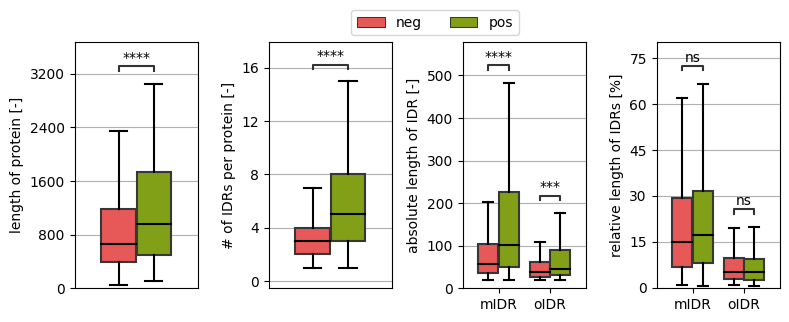

In [10]:
group_perspective = "Groups_all"

#### 3 figure ion one row

fig, ax = plt.subplots(1, 4, sharex=False, figsize=(8, 3))
# xticks = ["-30aa","-20aa","-10aa","motif","+10aa","+20aa","+30aa"]
xticks = False
categories_ordered = ["neg", "pos"]

metrics_ordered = ["protein_length"]
ytitle = "length of protein [-]"
ylim_bottom =-0.55
parent_create_boxplot_with_dots(expanded_df_melted, categories_ordered, metrics_ordered,group_perspective, ytitle, ylim_bottom, ax[0], xticks)

########################

categories_ordered = ["neg", "pos"]
metrics_ordered = ["num_of_IDR_regions"]
ytitle = "# of IDRs per protein [-]"
ylim_bottom =-0.55
parent_create_boxplot_with_dots(expanded_df_melted, categories_ordered, metrics_ordered,group_perspective, ytitle, ylim_bottom, ax[1])
plt.tight_layout()


#########################

xticks = ["mIDR", "oIDR"] #, "RGG_count"]
categories_ordered = ["neg", "pos"]
metrics_ordered = ["length_mIDR", "length_oIDR"]
ytitle = "absolute length of IDR [-]"

ylim_bottom =-0.25
parent_create_boxplot_with_dots(expanded_df_melted, categories_ordered, metrics_ordered,group_perspective, ytitle, ylim_bottom, ax[2], xticks, style='b', scatter=False)
#########################

xticks = ["mIDR", "oIDR"]
categories_ordered = ["neg", "pos"]
metrics_ordered = ["length_mIDR_rel", "length_oIDR_rel"]
ytitle = "relative length of IDRs [%]"
ylim_bottom =-0.25
parent_create_boxplot_with_dots(expanded_df_melted, categories_ordered, metrics_ordered,group_perspective, ytitle, ylim_bottom, ax[3], xticks, style='b', scatter=False)

handles, labels = [], []
for handle, label in zip(*fig.gca().get_legend_handles_labels()):
    handles.append(handle)
    labels.append(label)

fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.55, 1.08), ncol=2)
plt.tight_layout()

# subfolder= r'/mnt/d/phd/publications/1_RG_proteome_overview/subplots/'

# plt.savefig(subfolder + "1_IDR.svg")


In [53]:
proteins_with_idr_metrics_df[proteins_with_idr_metrics_df["proteins"] == "Q8N1G1"]

,proteins,num_of_IDR_regions,num_of_IDR_regions_w_motif,num_of_IDR_regions_wo_motif,IDR_bounds,motif_range,protein_length,Groups_num,Groups_all,Groups_LLPS,Groups_NA
24,Q8N1G1,4,1,3,"[(36, 75, IDR), (115, 598, MOTIF), (618, 692, ...","[(186, 193), (259, 264)]",1221,5,pos,pos,pos


In [41]:
motif_info_set_df[motif_info_set_df["UniqueID"] == "Q8N1G1"]

,orig_motif_index,UniqueID,EntryName,motif,r_to_g_ratio,g_perc,r_perc,start,end,full_seq,...,IDR_overlap,IDR_position,PTM_names,PTM_distance,PTM_players,PTM_type,cur_llps_type,llps_pred_score,llps_pred_rank,source
632,55,Q8N1G1,REXO1_HUMAN,DRGQGRGG,0.5,50.000000,25.000000,186,193,MLRSTGFFRAIDCPYWSGAPGGPCRRPYCHFRHRGARGSGAPGDGG...,...,yes,0.688797,"[Omega-N-methylarginine, Phosphoserine, Phosph...","[0, 94, 96, 165, 266, 306, 333, 417, 721]","[[], [], [], [], [], [], [], [], []]","[MOD_RES, MOD_RES, MOD_RES, MOD_RES, MOD_RES, ...",None,0.819168,0.526992,HUMAN
633,56,Q8N1G1,REXO1_HUMAN,PRGSRG,1.0,33.333333,33.333333,259,264,MLRSTGFFRAIDCPYWSGAPGGPCRRPYCHFRHRGARGSGAPGDGG...,...,yes,0.390041,"[Omega-N-methylarginine, Phosphoserine, Phosph...","[-68, 23, 25, 94, 195, 235, 262, 346, 650]","[[], [], [], [], [], [], [], [], []]","[MOD_RES, MOD_RES, MOD_RES, MOD_RES, MOD_RES, ...",None,0.819168,0.526992,HUMAN


In [54]:
expanded_motifs_df

,proteins,num_of_IDR_regions,num_of_IDR_regions_w_motif,num_of_IDR_regions_wo_motif,IDR_bounds,motif_range,protein_length,Groups_num,Groups_all,Groups_LLPS,Groups_NA
0,Q5SSQ6,1,1,0,"[(119, 148, MOTIF)]","(135, 144)",148,7,neg,neg,neg
1,Q7Z7L8,3,1,2,"[(146, 196, MOTIF), (216, 315, IDR), (344, 372...","(146, 168)",435,4,Not in any group,pos,neg
2,Q8NAF0,4,1,3,"[(0, 43, MOTIF), (138, 203, IDR), (326, 379, I...","(15, 36)",562,6,Not in any group,neg,pos
3,Q9ULH4,4,1,3,"[(382, 424, IDR), (576, 602, IDR), (618, 654, ...","(681, 690)",789,7,neg,neg,neg
4,Q8N878,3,1,2,"[(0, 40, MOTIF), (376, 400, IDR), (421, 464, I...","(5, 9)",549,7,neg,neg,neg
...,...,...,...,...,...,...,...,...,...,...,...
658,Q53GS9,2,1,1,"[(0, 61, MOTIF), (74, 95, IDR)]","(9, 23)",565,4,Not in any group,pos,neg
659,Q13470,2,1,1,"[(445, 493, MOTIF), (505, 579, IDR)]","(455, 462)",666,7,neg,neg,neg
660,Q8N8E1,2,1,1,"[(0, 80, MOTIF), (99, 139, IDR)]","(30, 34)",139,7,neg,neg,neg
661,Q8NG27,2,1,1,"[(0, 363, MOTIF), (379, 454, IDR)]","(306, 310)",643,4,Not in any group,pos,neg


In [55]:
proteins_with_idr_metrics_df["Groups_all"].value_counts()

Not in any group    240
neg                 230
pos                 193
Name: Groups_all, dtype: int64

In [56]:
expanded_motifs_df = proteins_with_idr_metrics_df.explode('motif_range')
print(len(expanded_motifs_df))
print(len(expanded_motifs_df[expanded_motifs_df["Groups_all"] == "pos"]))
print(len(expanded_motifs_df[expanded_motifs_df["Groups_all"] == "neg"]))
print(motif_info_set_df[motif_info_set_df["UniqueID"].isin(set_list[set_names.index("GAR_pos")])])

830
287
247
      orig_motif_index UniqueID    EntryName         motif  r_to_g_ratio  \
625                 40   P0CJ87  DU4L4_HUMAN         ARGRG      1.000000   
631                 51   Q13151   ROA0_HUMAN  SRGGRGGRGRGG      0.571429   
632                 55   Q8N1G1  REXO1_HUMAN      DRGQGRGG      0.500000   
633                 56   Q8N1G1  REXO1_HUMAN        PRGSRG      1.000000   
635                 61   A6NEQ0  RBY1E_HUMAN    ARGSRGGTRG      0.750000   
...                ...      ...          ...           ...           ...   
1411              2048   P33240  CSTF2_HUMAN  SRGPPPHELRGG      0.666667   
1413              2058   Q92841  DDX17_HUMAN    DRGGFGARGG      0.400000   
1415              2061   Q9P1Z0  ZBTB4_HUMAN      RRGASTRG      1.500000   
1426              2085   P55201  BRPF1_HUMAN    GRGKPSFSRG      0.666667   
1430              2101   Q8N7U7  TPRX1_HUMAN        GQRGRG      0.666667   

         g_perc     r_perc  start   end  \
625   40.000000  40.000000     1

In [57]:
# pos of motif in IDR

def extract_motif_tuples(row):
    motif_range = row['motif_range']
    IDR_bounds = row['IDR_bounds']
    
    # print(row["proteins"])
    # print(motif_range)
    # print(IDR_bounds)
    flag_success = False
    for el in IDR_bounds:
        if el[2] == "MOTIF":
            len_idr = el[1] - el[0]
            if is_either_between(el[0], el[1], motif_range[0], motif_range[1]):
                #### this is the corresponding IDR_bound
                ### now calc the two differences
                idr_third = (len_idr /3)
                left_diff = motif_range[0] - el[0]
                right_diff = el[1] - motif_range[1]
                pos_scale = ((((motif_range[1] + motif_range[0]) / 2) - el[0])/ (el[1] - el[0]))
                flag_success = True
                break
    if flag_success:
        if left_diff < idr_third:
            if right_diff < idr_third:
                return "ENTIRE", left_diff, right_diff, len_idr, pos_scale
            else:
                return "N-TERMINAL", left_diff, right_diff, len_idr, pos_scale
        else:
            if right_diff < idr_third:
                return "C-TERMINAL", left_diff, right_diff, len_idr, pos_scale
            else:
                return "CENTRAL", left_diff, right_diff, len_idr, pos_scale
    else:
        # print(row["proteins"])
        return None, None, None, None

#### plot the lenghts of the IDRs for both groups in histograms
# cut_data = proteins_with_idr_metrics_df[proteins_with_idr_metrics_df["Groups_all"].isin(["pos", "neg"])]
# cut_data.reset_index(inplace=True, drop=True)
# print(len(cut_data))
expanded_motifs_df = proteins_with_idr_metrics_df.explode('motif_range')
print(len(expanded_motifs_df))

# expanded_motifs_df
# # expanded_df
# expanded_motifs_df["pos_motif_in_prot"] = expanded_motifs_df["motif_range"].apply(lambda x: x[0] + (x[1] - x[0])/2 if isinstance(x, tuple) else None)
expanded_motifs_df["motif_pos_cat_in_IDR"], expanded_motifs_df["distance_to_NTend_of_IDR"], expanded_motifs_df["distance_to_CTend_of_IDR"], expanded_motifs_df["len_IDR"], expanded_motifs_df["motif_pos_scale_in_IDR"] = zip(*expanded_motifs_df.apply(extract_motif_tuples, axis=1))
expanded_motifs_df["distance_to_NTend_of_IDR_rel"] = expanded_motifs_df["distance_to_NTend_of_IDR"] / expanded_motifs_df["len_IDR"]
expanded_motifs_df["distance_to_CTend_of_IDR_rel"] = expanded_motifs_df["distance_to_CTend_of_IDR"] / expanded_motifs_df["len_IDR"]
# print(len(expanded_motifs_df))
# exp_expanded_motifs_df = expanded_motifs_df.explode('motif_IDR_bounds')
# # expanded_df["type_IDR"] = expanded_df["IDR_bounds"].apply(lambda x: x[2] if isinstance(x, tuple) else None)
# # # expanded_df[expanded_df["length_IDR"].apply(pd.isna)]
# # expanded_df.reset_index(drop=True, inplace=True)
print(len(expanded_motifs_df))
expanded_motifs_df = expanded_motifs_df[~expanded_motifs_df["motif_pos_cat_in_IDR"].apply(pd.isna)]
print(len(expanded_motifs_df))

# expanded_motifs_df

830
830
830


In [58]:
motif_info_set_df

,orig_motif_index,UniqueID,EntryName,motif,r_to_g_ratio,g_perc,r_perc,start,end,full_seq,...,IDR_overlap,IDR_position,PTM_names,PTM_distance,PTM_players,PTM_type,cur_llps_type,llps_pred_score,llps_pred_rank,source
608,0,Q5SSQ6,SAPC1_HUMAN,QRGCTKGPRG,0.666667,30.000000,20.000000,135,144,MGSQGSGGVPLVQAPYTVLLLPLGTSRQDPGAQSFFLWLRRMQALE...,...,yes,-0.500000,[],[],[],[],None,0.121801,0.086503,HUMAN
609,2,Q7Z7L8,CK096_HUMAN,LRGRGFSRNPRGRGLPSGAGWRG,0.857143,30.434783,26.086957,146,168,MGNKQPQKVTVPTGTALQGVVLIVSTLHQPGGWICGKDPCCSLRPL...,...,yes,0.551020,"[Phosphothreonine, Phosphoserine, Phosphoserin...","[200, 217, 231, 241, 257, 263]","[[], [], [], [], [], []]","[MOD_RES, MOD_RES, MOD_RES, MOD_RES, MOD_RES, ...",None,0.754444,0.483994,HUMAN
610,4,Q8NAF0,ZN579_HUMAN,HRGRGRGRGRGRGRGRGRGRGG,0.909091,50.000000,45.454545,15,36,MDPQPPPPAQGSPPHRGRGRGRGRGRGRGRGRGRGGAGAPRAPLPC...,...,yes,-0.219512,"[Omega-N-methylarginine, Phosphoserine, Phosph...","[56, 158, 160, 447]","[[], [], [], []]","[MOD_RES, MOD_RES, MOD_RES, MOD_RES]",None,0.389831,0.560056,HUMAN
611,6,Q9ULH4,LRFN2_HUMAN,GRGAGTSARG,0.500000,40.000000,20.000000,681,690,METLLGGLLAFGMAFAVVDACPKYCVCQNLSESLGTLCPSKGLLFV...,...,yes,-0.117647,"[N-linked (GlcNAc...) asparagine, N-linked (Gl...","[-652, -349, -340, -297, -371]","[[], [], [], [], []]","[CARBOHYD, CARBOHYD, CARBOHYD, CARBOHYD, DISUL...",None,0.078058,0.292100,HUMAN
612,10,Q8N878,FRMD1_HUMAN,PRGRG,1.000000,40.000000,40.000000,5,9,MAVPPRGRGIDPARTNPDTFPPSGARCMEPSPERPACSQQEPTLGM...,...,yes,0.684211,[],[],[],[],None,0.261972,0.259337,HUMAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,2107,Q53GS9,SNUT2_HUMAN,SRGSTRGKRESESRG,1.333333,20.000000,26.666667,9,23,MSGRSKRESRGSTRGKRESESRGSSGRVKRERDREREPEAASSRGS...,...,yes,0.491525,"[Phosphoserine, Phosphoserine, Glycyl lysine i...","[23, 59, 28]","[[], [], []]","[MOD_RES, MOD_RES, CROSSLNK]",Client,0.534845,0.483784,HUMAN
1434,2114,Q13470,TNK1_HUMAN,HRGTPARG,1.000000,25.000000,25.000000,455,462,MLPEAGSLWLLKLLRDIQLAQFYWPILEELNVTRPEHFDFVKPEDL...,...,yes,0.404255,"[Phosphoserine, Phosphoserine, Phosphoserine, ...","[-395, -359, -200, 40, 52, 57, 120, -44]","[[], [], [], [], [], [], [], []]","[MOD_RES, MOD_RES, MOD_RES, MOD_RES, MOD_RES, ...",None,0.074419,0.463465,HUMAN
1435,2116,Q8N8E1,MAAS1_HUMAN,PRGRG,1.000000,40.000000,40.000000,30,34,MALSMSLSSDILSGAPTAGRGGGCSAALSPRGRGSKGLGTRAPGPR...,...,yes,0.205128,[],[],[],[],None,0.208760,0.410388,HUMAN
1436,2117,Q8NG27,PJA1_HUMAN,RRGRG,1.500000,40.000000,60.000000,306,310,MGQESSKPVWPNPTGGYQSNTGRRYGRRHAYVSFRPPTSQRERIAS...,...,yes,-0.700831,"[Phosphoserine, Phosphothreonine, Phosphoserin...","[-41, -29, 55, 57]","[[], [], [], []]","[MOD_RES, MOD_RES, MOD_RES, MOD_RES]",Client,0.599737,0.822601,HUMAN


In [59]:
expanded_motifs_df[expanded_motifs_df["Groups_all"] == "pos"]

,proteins,num_of_IDR_regions,num_of_IDR_regions_w_motif,num_of_IDR_regions_wo_motif,IDR_bounds,motif_range,protein_length,Groups_num,Groups_all,Groups_LLPS,Groups_NA,motif_pos_cat_in_IDR,distance_to_NTend_of_IDR,distance_to_CTend_of_IDR,len_IDR,motif_pos_scale_in_IDR,distance_to_NTend_of_IDR_rel,distance_to_CTend_of_IDR_rel
17,P0CJ87,5,1,4,"[(0, 24, MOTIF), (71, 102, IDR), (147, 167, ID...","(15, 19)",422,5,pos,pos,pos,C-TERMINAL,15,5,24,0.708333,0.625000,0.208333
23,Q13151,2,1,1,"[(173, 214, MOTIF), (261, 305, IDR)]","(191, 202)",305,5,pos,pos,pos,C-TERMINAL,18,12,41,0.573171,0.439024,0.292683
24,Q8N1G1,4,1,3,"[(36, 75, IDR), (115, 598, MOTIF), (618, 692, ...","(186, 193)",1221,5,pos,pos,pos,N-TERMINAL,71,405,483,0.154244,0.146998,0.838509
24,Q8N1G1,4,1,3,"[(36, 75, IDR), (115, 598, MOTIF), (618, 692, ...","(259, 264)",1221,5,pos,pos,pos,N-TERMINAL,144,334,483,0.303313,0.298137,0.691511
26,A6NEQ0,2,1,1,"[(66, 348, MOTIF), (452, 496, IDR)]","(112, 121)",496,5,pos,pos,pos,N-TERMINAL,46,227,282,0.179078,0.163121,0.804965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,P33240,3,1,2,"[(205, 243, IDR), (339, 409, MOTIF), (507, 532...","(364, 375)",577,5,pos,pos,pos,CENTRAL,25,34,70,0.435714,0.357143,0.485714
640,Q92841,3,1,2,"[(19, 115, MOTIF), (550, 623, IDR), (658, 729,...","(93, 102)",729,5,pos,pos,pos,C-TERMINAL,74,13,96,0.817708,0.770833,0.135417
642,Q9P1Z0,7,1,6,"[(66, 124, IDR), (182, 221, IDR), (256, 281, M...","(257, 264)",1013,5,pos,pos,pos,N-TERMINAL,1,17,25,0.180000,0.040000,0.680000
652,P55201,4,1,3,"[(42, 87, IDR), (117, 177, IDR), (447, 489, ID...","(1024, 1033)",1214,5,pos,pos,pos,C-TERMINAL,206,29,244,0.862705,0.844262,0.118852


0.7732699634472388 0.43970606900413245


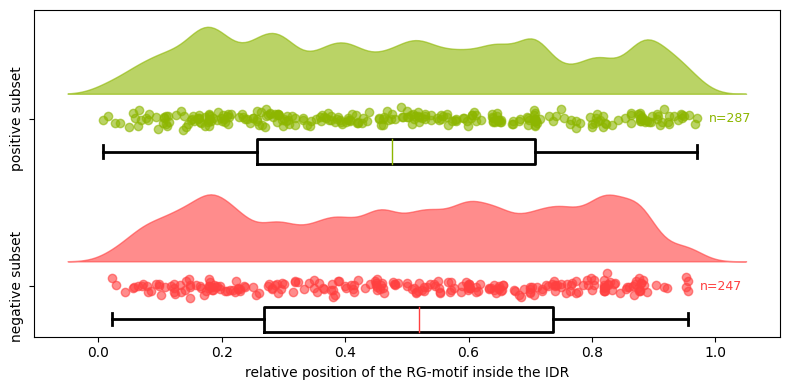

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde
from scipy import stats

# # Sample data
# np.random.seed(41)
# n_samples = 100
# group_positive = np.random.randint(1, 100, n_samples)
# np.random.seed(33)
# group_negative = np.random.randint(1, 100, n_samples)

# # Create a dataframe for easy plotting
# data = pd.DataFrame({
#     'motif_pos_scale_in_IDR': np.concatenate([group_positive, group_negative]),
#     'Group': ['Positive'] * n_samples + ['Negative'] * n_samples
# })

# Convert group to numeric values

group_perspective = 'Groups_all'

group_mapping = {'pos': 1, 'neg': 0}
expanded_motifs_df['Group_numeric'] = expanded_motifs_df[group_perspective].map(group_mapping)
negative_data = expanded_motifs_df[expanded_motifs_df['Group_numeric'] == 0]['motif_pos_scale_in_IDR']
positive_data = expanded_motifs_df[expanded_motifs_df['Group_numeric'] == 1]['motif_pos_scale_in_IDR']

neg_color = '#FF4040'
pos_color = '#8DB600'

# Set up the figure
plt.figure(figsize=(8, 4))

# Violin plot settings
positions = [0, 1]  # Y positions for Negative and Positive groups
width = 0.4

def plot_violin(ax, data, pos, width):
    """Function to create a horizontal violin plot."""
    # Calculate the density
    density = gaussian_kde(data, bw_method=0.1)
    xs = np.linspace(-0.05, 1.05, 200)
    ys = density(xs)
    
    # Scale the density to fit within the specified width
    ys = ys / ys.max() * width
    # print(ys)
    # print(xs)
    # print(pos)
    # Draw the right half (for Positive) and left half (for Negative)
    ax.fill_between(xs, ys+pos, pos, alpha=0.6, color=pos_color if pos > 0.5 else neg_color)

vertical_shift = 0.15

# Plot both halves of the split violin
plot_violin(plt.gca(), negative_data, positions[0]+vertical_shift, width)  # Negative group
plot_violin(plt.gca(), positive_data, positions[1]+vertical_shift, width)  # Positive group

# Add boxplots (set vert=False for horizontal boxplots)
plt.boxplot(positive_data,
            positions=[1 - vertical_shift*1.3],  # Adjust positions for horizontal layout
            widths=0.15, vert=False,    
            boxprops=dict(color='black', linewidth=2),  # Change box color and thickness
            whiskerprops=dict(color='black', linewidth=2),  # Change whiskers color and thickness
            capprops=dict(color='black', linewidth=2),  # Change caps color and thickness
            medianprops=dict(color=pos_color, linewidth=1))  # Set vert=False for horizontal boxplots

plt.boxplot(negative_data,
            positions=[0 -vertical_shift*1.3],  # Adjust positions for horizontal layout
            widths=0.15, vert=False,    
            boxprops=dict(color='black', linewidth=2),  # Change box color and thickness
            whiskerprops=dict(color='black', linewidth=2),  # Change whiskers color and thickness
            capprops=dict(color='black', linewidth=2),  # Change caps color and thickness
            medianprops=dict(color=neg_color, linewidth=1))  # Set vert=False for horizontal boxplots
# Perform statistical test (e.g., t-test)
group0 = negative_data
group1 = positive_data
t_stat, p_value = stats.ttest_ind(group0, group1)
print(t_stat, p_value)
# # Annotation for significance
# if p_value < 0.05:  # Adjust this threshold as needed
#     significance_text = 'p < 0.05'
# else:
#     significance_text = 'ns'  # not significant

# # Add annotations
# y_position = 0.5  # Adjust y position for annotation (in boxplot coordinates)
# plt.annotate(
#     significance_text,
#     xy=(0.35, y_position),  # X position in the center of the two boxplots
#     xytext=(0.35, y_position + 0.1),  # Position of the text
#     arrowprops=dict(arrowstyle='->', lw=1.5),  # Arrow pointing to the boxplot
#     fontsize=12,
#     ha='center'  # Center align the text
# )
# Add jittered scatter plot
jitter_strength = 0.025  # Adjust this value for more or less jitter
plt.scatter(negative_data,
            np.full(len(expanded_motifs_df[expanded_motifs_df['Group_numeric'] == 0]), positions[0]) + np.random.normal(0, jitter_strength, size=len(expanded_motifs_df[expanded_motifs_df['Group_numeric'] == 0])),
            color=neg_color, alpha=0.6)
# print(len(negative_data))
plt.scatter(positive_data,
            np.full(len(expanded_motifs_df[expanded_motifs_df['Group_numeric'] == 1]), positions[1]) + np.random.normal(0, jitter_strength, size=len(expanded_motifs_df[expanded_motifs_df['Group_numeric'] == 1])),
            color=pos_color, alpha=0.6)
# print(len(positive_data))

plt.text(max(negative_data)*1.02, 0, f'n={len(negative_data)}', fontsize=9, ha='left',va='center', color=neg_color)


plt.text(max(positive_data)*1.02, 1, f'n={len(positive_data)}', fontsize=9, ha='left',va='center',  color=pos_color)



# Set y-axis labels manually
plt.yticks(positions, ['negative subset', 'positive subset'], rotation=90, va='center')
plt.ylim(-0.3, 1.65)

# Set title and labels
# plt.title(group_perspective)
plt.xlabel('relative position of the RG-motif inside the IDR')  # Add x-label
plt.tight_layout()

subfolder= r'/mnt/d/phd/publications/1_RG_proteome_overview/subplots/'

plt.savefig(subfolder + "suppl_RGmotif_position_IDR.svg")

plt.show()


In [ ]:
print(exted)

motif_pos_cat_in_IDR  C-TERMINAL  CENTRAL  ENTIRE  N-TERMINAL
Groups_all                                                   
Not in any group              94       52       4         107
neg                           93       43       4          93
pos                           71       35      10         106
Chi-2 stat: 10.09
p-val: 0.1211
There is no significant difference in composition between the two groups.
motif_pos_cat_in_IDR  C-TERMINAL   CENTRAL    ENTIRE  N-TERMINAL
Groups_all                                                      
Not in any group        0.365759  0.202335  0.015564    0.416342
neg                     0.399142  0.184549  0.017167    0.399142
pos                     0.319820  0.157658  0.045045    0.477477


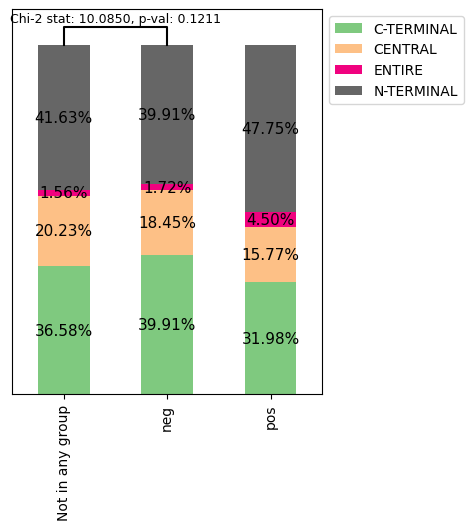

In [390]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# # Example data
# np.random.seed(47)
# data = {'Group': np.random.choice(['pos', 'neg'], 1000),
#         'Category': np.random.choice(['A', 'B', 'C', 'D'], 1000)}

# df = pd.DataFrame(data)

# Count the occurrences of each combination of Group and Category
count_table = pd.crosstab(expanded_motifs_df['Groups_all'], expanded_motifs_df['motif_pos_cat_in_IDR'])

print(count_table)

# Perform chi-square test
chi2, pval, _, _ = chi2_contingency(count_table)

# Display the results
print(f'Chi-2 stat: {chi2:.4}')
print(f'p-val: {pval:.4}')

# Determine statistical significance
alpha = 0.05
if pval < alpha:
    print('The difference in composition is statistically significant.')
else:
    print('There is no significant difference in composition between the two groups.')


# Normalize the counts to have the same height for each group
normalized_count_table = count_table.div(count_table.sum(axis=1), axis=0)
print(normalized_count_table)
# fig = plt.figure(figsize=(3, 5))
# Plot a stacked bar chart with normalized heights
ax = normalized_count_table.plot(kind='bar', stacked=True, colormap='Accent')
ax.get_figure().set_size_inches(4, 5)
# Add labels inside the stacked bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=11)

x1, x2 = 0, 1
y, h, col = 1, 0.05, 'k'
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax.text((x1+x2)*.5, y+h*1.15, ("Chi-2 stat: %.4f, p-val: %.4f" % (chi2, pval)), ha='center', va='bottom', color=col, size=9)

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
# ax.grid(axis='y', zorder=0)
# ax.set_axisbelow(True)
# Add labels and title
plt.xlabel('')
# plt.ylabel('Proportion')
# plt.xticks([0,1],['negative group', 'positive group'],rotation=0)
plt.yticks([])
# plt.title('position of the RG motif in the IDR (categorized)')

# Show the plot
plt.show()
# ax.get_figure().savefig(r'/mnt/d/phd/scripts/2_feature_correlation/outputs/IDR_stats/' + "pos_of_motif_in_IDR" + "_categorized.png", bbox_inches= 'tight')

In [ ]:
### what i see here is that the motif likes to be ne terminal in its IDR region

In [ ]:
##### BACKUP CODE
### also some cool visualization, but only if it works

In [128]:
# now plt this 2 dimensional and consider the actual distances between the NT end of the IDR and the motif and the CT end of the IDR and the motif

red_data = expanded_motifs_df[(expanded_motifs_df['distance_to_NTend_of_IDR'] < 150) & (expanded_motifs_df['distance_to_CTend_of_IDR'] < 150)]

# red_data['distance_to_NTend_of_IDR'][red_data['distance_to_NTend_of_IDR'] < 0 ] = 0
# red_data['distance_to_CTend_of_IDR'][red_data['distance_to_CTend_of_IDR'] < 0 ] = 0

names_to_exclude = ['P86479', 'P86496', 'P86480', 'P86481', 'P0CJ86', 'P0CJ87', 'P0CJ88', 'P0CJ89', 'P0CJ90']

print(len(red_data))
red_data = red_data[~red_data['proteins'].isin(names_to_exclude)]
print(len(red_data))

pos_data = red_data[red_data['Group'] == "pos"]
neg_data = red_data[red_data['Group'] == "neg"]
# pos_data
x_pos = pos_data['distance_to_NTend_of_IDR']
y_pos = pos_data['distance_to_CTend_of_IDR']
x_rel_pos = pos_data['distance_to_NTend_of_IDR'] / pos_data['len_IDR']
y_rel_pos = pos_data['distance_to_CTend_of_IDR'] / pos_data['len_IDR']

x_neg = neg_data['distance_to_NTend_of_IDR']
y_neg = neg_data['distance_to_CTend_of_IDR']
x_rel_neg = neg_data['distance_to_NTend_of_IDR'] / neg_data['len_IDR']
y_rel_neg = neg_data['distance_to_CTend_of_IDR'] / neg_data['len_IDR']



#### remaining are P86478 and P0CJ85
### whya re they removed?



675
666


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


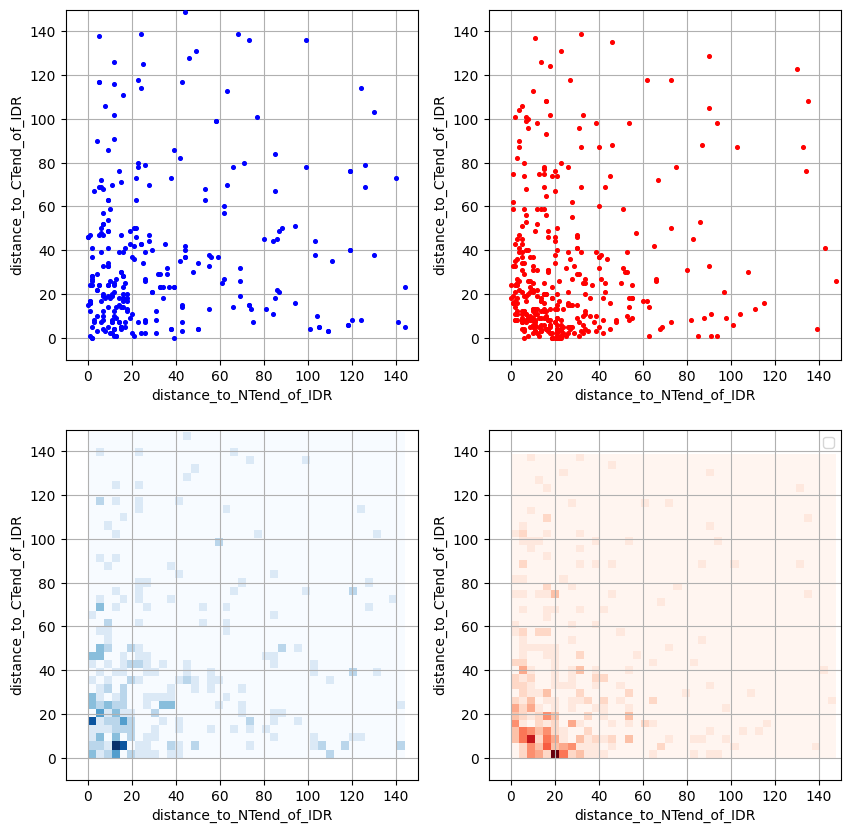

In [129]:
# Plotting x and y values in a graph
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0][0].scatter(x_pos, y_pos, color='blue', label='Data Points', zorder=3, s=7)  # Scatter plot
axes[0][1].scatter(x_neg, y_neg, color='red', label='Data Points', zorder=3, s=7)  # Scatter plot
axes[1][0].hist2d(x_pos, y_pos, bins=40, cmap='Blues', density=False)  # 20 bins, using the 'viridis' colormap
axes[1][1].hist2d(x_neg, y_neg, bins=40, cmap='Reds', density=True)  # 20 bins, using the 'viridis' colormap

for axis in axes:
    for axis2 in axis:
        axis2.set_xlim(-10,150)
        axis2.set_ylim(-10,150)
        axis2.set_xlabel('distance_to_NTend_of_IDR')
        axis2.set_ylabel('distance_to_CTend_of_IDR')
        axis2.grid()

# plt.xlim(0,200)
# plt.ylim(0,200)

# Show legend and grid (optional)
plt.legend()



# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


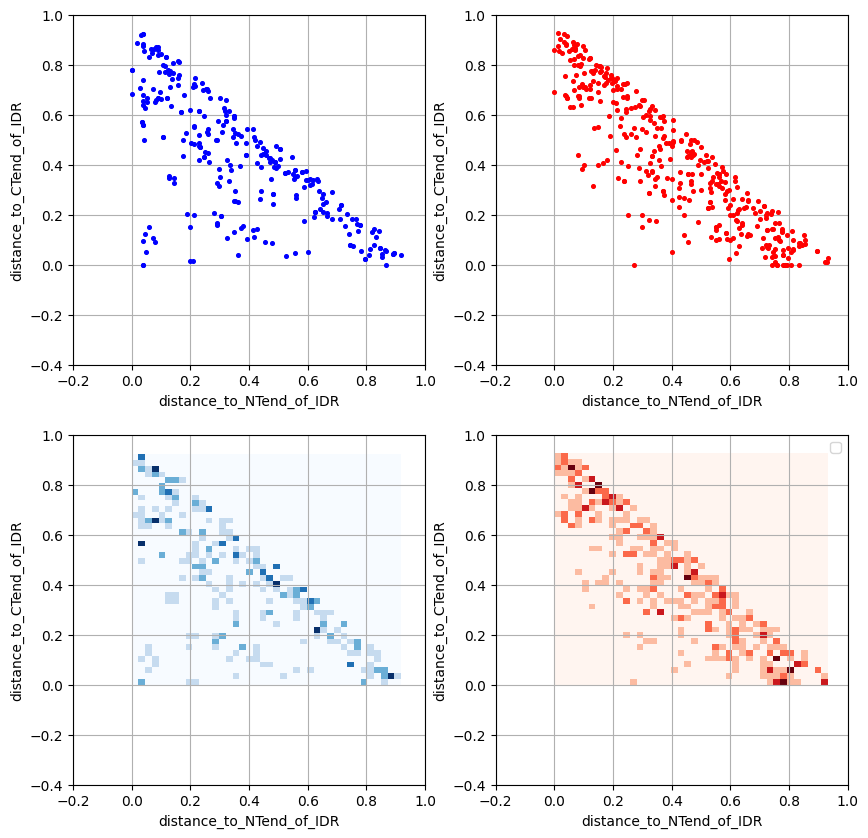

In [130]:

# Plotting x and y values in a graph
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0][0].scatter(x_rel_pos, y_rel_pos, color='blue', label='Data Points', zorder=3, s=7)  # Scatter plot
axes[0][1].scatter(x_rel_neg, y_rel_neg, color='red', label='Data Points', zorder=3, s=7)  # Scatter plot
axes[1][0].hist2d(x_rel_pos, y_rel_pos, bins=40, cmap='Blues')  # 20 bins, using the 'viridis' colormap
axes[1][1].hist2d(x_rel_neg, y_rel_neg, bins=40, cmap='Reds')  # 20 bins, using the 'viridis' colormap

for axis in axes:
    # axis[0].set_xlim(0,100)
    for axis2 in axis:
        axis2.set_xlim(-0.2,1)
        axis2.set_ylim(-0.4,1)
        axis2.set_xlabel('distance_to_NTend_of_IDR')
        axis2.set_ylabel('distance_to_CTend_of_IDR')
        axis2.grid()

# plt.xlim(0,200)
# plt.ylim(0,200)

# Show legend and grid (optional)
plt.legend()



# Show the plot
plt.show()

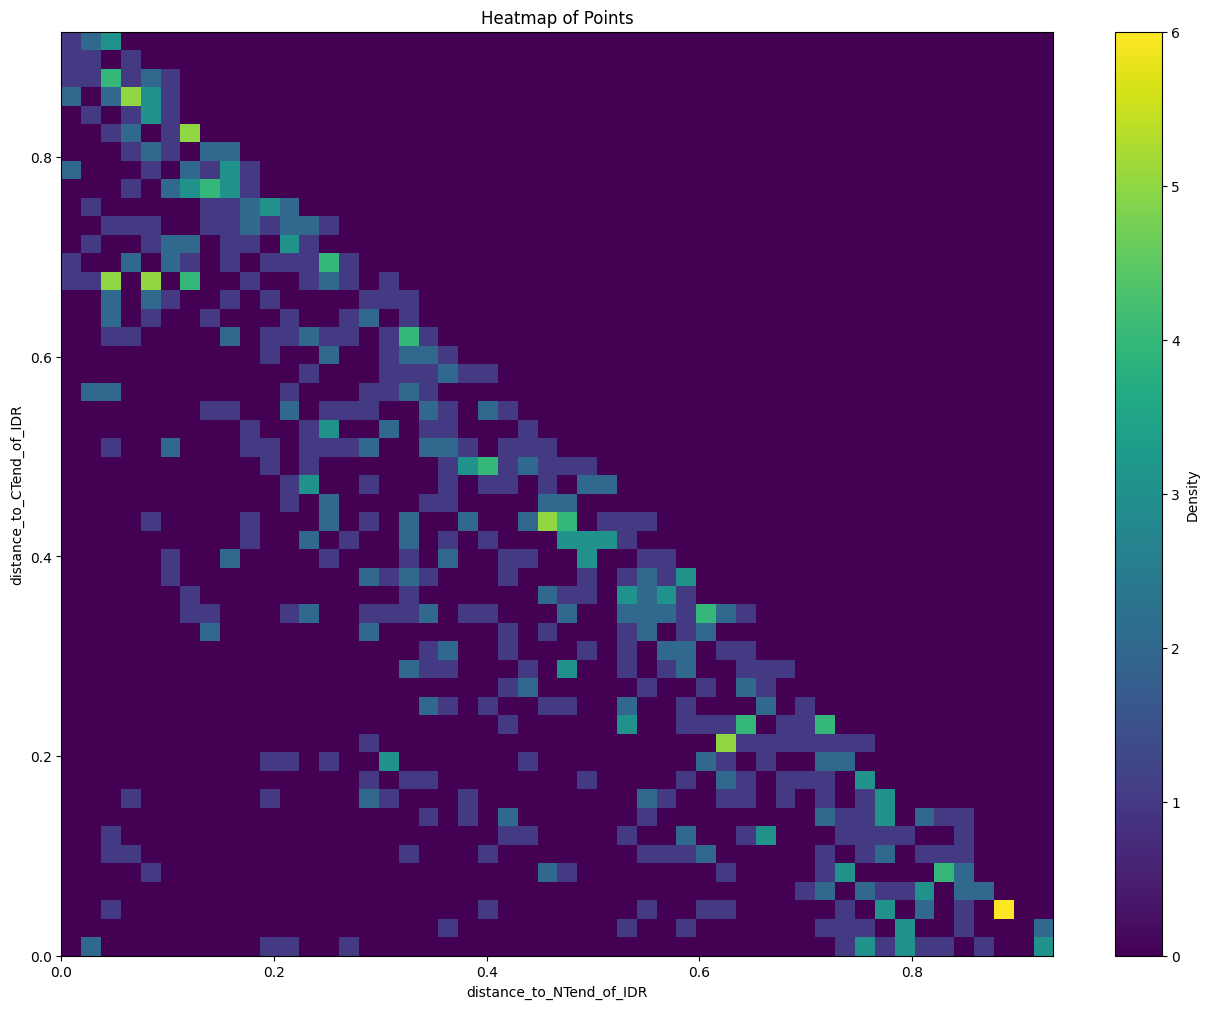

In [131]:
# Create a 2D histogram (heatmap)

x_rel = red_data['distance_to_NTend_of_IDR'] / red_data['len_IDR']
y_rel = red_data['distance_to_CTend_of_IDR'] / red_data['len_IDR']


plt.figure(figsize=(16, 12))  # Adjust the figure size if needed
counts,ybins,xbins,image =  plt.hist2d(x_rel, y_rel, bins=50, cmap='viridis')  # 20 bins, using the 'viridis' colormap
# plt.contour(counts,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],linewidths=3)
plt.colorbar(label='Density')  # Add colorbar to indicate density
# plt.xlim(0,100)
# plt.ylim(0,100)
# plt.contourf(x, y,15)
plt.xlabel('distance_to_NTend_of_IDR')
plt.ylabel('distance_to_CTend_of_IDR')
plt.title('Heatmap of Points')

# Show the plot
plt.show()

In [ ]:
# i dont know nothing too interesting

In [ ]:
#### BACKUP


In [ ]:
###### lazy histograms

group_perspective = "Groups_NA"

cut_data = proteins_with_idr_metrics_df[proteins_with_idr_metrics_df[group_perspective].isin(["pos", "neg"])]
# cut_data['Group_merged'] = cut_data['Group'].replace({4: '4-5', 5: '4-5', })



fig = plt.figure(figsize=(10, 5))
plt.title("num_of_IDR_regions")
sns.histplot(data=cut_data, x="num_of_IDR_regions", hue=group_perspective,binwidth=1,stat='proportion', kde=True,common_norm=False, palette=['mediumseagreen', 'lightcoral'])
fig.savefig(r'/mnt/d/phd/scripts/2_feature_correlation/outputs/IDR_stats/' + "num_of_IDR_regions.png")
fig = plt.figure(figsize=(10, 5))
plt.title("num_of_IDR_regions_w_motif")
sns.histplot(data=cut_data, x="num_of_IDR_regions_w_motif", hue=group_perspective,binwidth=1,stat='proportion', kde=True,common_norm=False, palette=['mediumseagreen', 'lightcoral'])
fig.savefig(r'/mnt/d/phd/scripts/2_feature_correlation/outputs/IDR_stats/' + "num_of_IDR_regions_w_motif.png")

fig = plt.figure(figsize=(10, 5))
plt.title("num_of_IDR_regions_wo_motif")
sns.histplot(data=cut_data, x="num_of_IDR_regions_wo_motif", hue=group_perspective,binwidth=1,stat='proportion', kde=True,common_norm=False, palette=['mediumseagreen', 'lightcoral'])
fig.savefig(r'/mnt/d/phd/scripts/2_feature_correlation/outputs/IDR_stats/' + "num_of_IDR_regions_wo_motif.png")


In [ ]:
fig = plt.figure(figsize=(10, 5))
plt.title("length_IDR (relative value)")
sns.histplot(data=expanded_df, x="length_IDR_rel", hue='Group', stat='proportion', kde=True,common_norm=False, palette=['mediumseagreen', 'lightcoral'], binwidth= 1)
fig.savefig(r'/mnt/d/phd/scripts/2_feature_correlation/outputs/IDR_stats/' + "length_IDR_rel" + "_dist.png", bbox_inches= 'tight')
# plt.xlim(0, 500)
fig = plt.figure(figsize=(10, 5))
plt.title("length_IDR (absolute value)")
sns.histplot(data=expanded_df, x="length_IDR", hue='Group', stat='proportion', kde=True,common_norm=False, palette=['mediumseagreen', 'lightcoral'], binwidth= 1)
fig.gca().set_xlim(0,500)
fig.savefig(r'/mnt/d/phd/scripts/2_feature_correlation/outputs/IDR_stats/' + "length_IDR_abs" + "_dist.png", bbox_inches= 'tight')



fig = plt.figure(figsize=(10, 5))
plt.title("length_motif_IDR")
sns.histplot(data=expanded_df[expanded_df["type_IDR"] == "MOTIF"], x="length_IDR_rel", hue='Group', stat='proportion', kde=True,common_norm=False, palette=['mediumseagreen', 'lightcoral'], binwidth= 1)
# plt.xlim(0, 500)
fig = plt.figure(figsize=(10, 5))
plt.title("length_nonmotif_IDR")
sns.histplot(data=expanded_df[expanded_df["type_IDR"] == "IDR"], x="length_IDR_rel", hue='Group', stat='proportion', kde=True,common_norm=False, palette=['mediumseagreen', 'lightcoral'], binwidth= 1)
# plt.xlim(0, 500)
 # , stat='proportion', kde=True,common_norm=False, palette=['mediumseagreen', 'lightcoral']
fig = plt.figure(figsize=(10, 5))
plt.title("length_IDR")
sns.histplot(data=expanded_df, x="length_IDR", hue='Group', stat='proportion', kde=True,common_norm=False, palette=['mediumseagreen', 'lightcoral'], binwidth= 1)
fig.gca().set_xlim(0,500)

In [ ]:
### THIS COMPARES WITHIN THE GROUPS POS AND NEG, WHETHER THE IDRS WITH MOTIF (MOTIF) ARE LONGER OR THE IDRS WITHOUT MOTIF (IDR)

fig = plt.figure(figsize=(10, 5))
plt.title("length_IDR_positive")
sns.histplot(data=expanded_df[expanded_df["Group"] == "pos"], x="length_IDR_rel", hue='type_IDR', stat='proportion', kde=True,common_norm=False, palette=['mediumseagreen', 'lightcoral'], binwidth= 5)
# plt.xlim(0, 500)
fig = plt.figure(figsize=(10, 5))
plt.title("length_IDR_negatives")
sns.histplot(data=expanded_df[expanded_df["Group"] == "neg"], x="length_IDR_rel", hue='type_IDR', stat='proportion', kde=True,common_norm=False, palette=['mediumseagreen', 'lightcoral'], binwidth= 5)
# plt.xlim(0, 500)

In [ ]:
##### visualize number of IDRS, but also

# cut_data = proteins_with_idr_metrics_df[proteins_with_idr_metrics_df["Group"].isin(["pos", "neg"])]

def create_boxplot_with_dots(data, metric, group_perspective, scatter=True, **kwargs):

    # Create boxplots for the two groups
    fig = plt.figure(figsize=(3, 5))

    # sns.boxplot(data=df, y=metric, x='Group', color='blue', width=0.5, showfliers = False, order=["pos", "neg"])
    ax = sns.boxplot(data=data, y=metric, x=group_perspective, width=0.75, order=["pos", "neg"], showfliers = False,  palette=['mediumseagreen', 'lightcoral'], ax=plt.gca(), **kwargs) # 
    if scatter:
        sns.stripplot(data=data, y=metric, x=group_perspective, color='black', order=["pos", "neg"], size=5, jitter=True, alpha=0.3) 
    # if ylimit !=0:
    #     plt.ylim(0,ylimit)
    # if type(outlierlim) == str:
    #     print(df[df["proteins"] == outlierlim]["Group"].tolist()[0])
    #     if df[df["proteins"] == outlierlim]["Group"].tolist()[0] == "pos":
    #         x = 0
    #     else:
    #         x = 1
    #     val = df[df["proteins"] == outlierlim][metric].tolist()[0]
    #     plt.annotate(outlierlim, (x, val))
    # elif outlierlim !=0:
    #     for i,row in df.iterrows():
    #         val = row[metric]
    #         # print(val)
    #         # print(row["Group"])
    #         if row["Group"] == "pos":
    #             x = 0
    #         else:
    #             x = 1
    #         if val > outlierlim:
    #             plt.annotate(row["proteins"], (x, val))
    #             print(row["proteins"])
    
    annotator = Annotator(plt.gca(), [("pos", "neg")], data=data, x=group_perspective, y=metric)
    # annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', hide_non_significant=True)
    annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', hide_non_significant=True, verbose=0,
    pvalue_thresholds=[[1e-4, "****"], [1e-3, "***"], [1e-2, "**"], [0.05, "*"]],  # removing ns as won't be shown
    )
    annotator.apply_and_annotate()


    # a = add_stat_annotation(plt.gca(),  data=data,
    #                                     x="Group",
    #                                     y=metric,
    #                                     box_pairs=[("pos", "neg")], #labels
    #                                     test='t-test_ind',
    #                                     text_format='star',
    #                                     verbose=0,
    #                                     loc='outside'
    #                                     )
    # a.get.set_position([10.125,0.11,0.775,0.77])
    # text = plt.text(2, 2, 'Hello, Matplotlib!')

    # Move the text annotation to a new position
    # text.set_position((4, 4))
    # print(text)
    # a[0].set_position((400,4,1,1), which= "both")
    ax.grid(axis='y', zorder=0)
    ax.set_axisbelow(True)
    plt.xticks([0,1],['positive group', 'negative group'])
    plt.xlabel("")
    # plt.title(metric, pad=50)
    plt.close()
    # plt.show()
    return fig, annotator

# fig, annotator = create_boxplot_with_dots(cut_data,"num_of_IDR_regions_wo_motif")
# display(fig)
# fig.savefig(r'/mnt/d/phd/scripts/2_feature_correlation/outputs/IDR_stats/' + "num_of_IDR_regions_wo_motif" + "_boxplot.png")
# fig, annotator  = create_boxplot_with_dots(cut_data,"num_of_IDR_regions_w_motif")
# display(fig)
# fig.savefig(r'/mnt/d/phd/scripts/2_feature_correlation/outputs/IDR_stats/' + "num_of_IDR_regions_w_motif" + "_boxplot.png")
# fig, annotator  = create_boxplot_with_dots(cut_data,"num_of_IDR_regions")
# display(fig)
# fig.savefig(r'/mnt/d/phd/scripts/2_feature_correlation/outputs/IDR_stats/' + "num_of_IDR_regions" + "_boxplot.png")


In [ ]:



group_perspective = "Groups_all"

fig, annotator  = create_boxplot_with_dots(expanded_df,"length_IDR_rel", group_perspective, scatter=False)
print(annotator._get_results("auto")[0].formatted_output)
# annotator.verbose
# annotator.annotate()
fig.gca().set_ylabel("relative length of IDRs [%]")
display(fig)
# fig.savefig(r'/mnt/d/phd/scripts/2_feature_correlation/outputs/IDR_stats/' + "len_of_IDR_regions_rel" + "_boxplot.png", bbox_inches= 'tight')


fig, annotator  = create_boxplot_with_dots(expanded_df,"length_IDR",group_perspective,  scatter=False)
print(annotator._get_results("auto")[0].formatted_output)
# annotator.verbose
# annotator.annotate()
fig.gca().set_ylabel("absolute length of IDRs")
display(fig)
# fig.savefig(r'/mnt/d/phd/scripts/2_feature_correlation/outputs/IDR_stats/' + "len_of_IDR_regions_abs" + "_boxplot.png", bbox_inches= 'tight')

fig, annotator  = create_boxplot_with_dots(expanded_df[expanded_df["type_IDR"] == "MOTIF"],"length_IDR_rel",group_perspective, scatter=False)
print(annotator._get_results("auto")[0].formatted_output)
fig.gca().set_title("len_of_motifIDR_regions", pad=30)
display(fig)


fig, annotator  = create_boxplot_with_dots(expanded_df[expanded_df["type_IDR"] == "MOTIF"],"length_IDR", group_perspective, scatter=False)
print(annotator._get_results("auto")[0].formatted_output)
fig.gca().set_title("len_of_motifIDR_regions", pad=30)
display(fig)
# # fig.savefig(r'/mnt/d/phd/scripts/2_feature_correlation/outputs/IDR_stats/' + "len_of_motifIDR_regions" + "_boxplot.png", bbox_inches= 'tight')

fig, annotator  = create_boxplot_with_dots(expanded_df[expanded_df["type_IDR"] == "IDR"],"length_IDR_rel",group_perspective,  scatter=False)
print(annotator._get_results("auto")[0].formatted_output)
fig.gca().set_title("len_of_otherIDR_regions", pad=30)
# fig.gca().set_ylim((0,100))
display(fig)



fig, annotator  = create_boxplot_with_dots(expanded_df[expanded_df["type_IDR"] == "IDR"],"length_IDR",group_perspective,  scatter=False)
print(annotator._get_results("auto")[0].formatted_output)
fig.gca().set_title("len_of_otherIDR_regions", pad=30)
# fig.gca().set_ylim((0,100))
display(fig)
# # fig.savefig(r'/mnt/d/phd/scripts/2_feature_correlation/outputs/IDR_stats/' + "len_of_otherIDR_regions" + "_boxplot.png", bbox_inches= 'tight')

# sns.boxplot(data=expanded_df, y="length_IDR", x='Group', width=0.75, order=["pos", "neg"], showfliers = False,  palette=['mediumseagreen', 'lightcoral'], ax=plt.gca()) # 
# sns.boxplot(data=expanded_df[expanded_df["type_IDR"] == "MOTIF"], y="length_IDR", x='Group', width=0.75, order=["pos", "neg"], showfliers = False,  palette=['mediumseagreen', 'lightcoral'], ax=plt.gca()) # 
# sns.boxplot(data=expanded_df[expanded_df["type_IDR"] == "IDR"], y="length_IDR", x='Group', width=0.75, order=["pos", "neg"], showfliers = False,  palette=['mediumseagreen', 'lightcoral'], ax=plt.gca()) # 
# # create_boxplot_with_dots(expanded_df,"length_IDR", scatter=False)
# expanded_df[expanded_df["type_IDR"] == "MOTIF"]